In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import math

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import xgboost

from sklearn.model_selection import train_test_split


In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df_train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [7]:
df_test.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [8]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
df_train.shape,df_test.shape

((54808, 14), (23490, 13))

In [11]:
#I will develop two model one without Education and previous_year_rating other with including them.

In [12]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [13]:
Target = df_train["is_promoted"]
#drop the target variable from train data
df_train = df_train.drop("is_promoted", axis=1)

In [14]:
#combine the dataset for processing
all_data = df_train.copy()

In [15]:
all_data = all_data.append(pd.DataFrame(data = df_test), ignore_index=True)

In [16]:
all_data.shape

(78298, 13)

In [17]:
all_data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [18]:
#droping employee_id
all_data = all_data.drop("employee_id",axis=1)

In [19]:
#1st model droping education and previous_year_rating
all_data = all_data.drop(["education", "previous_year_rating"],axis=1)

In [20]:
all_data.head()

,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49
1,Operations,region_22,m,other,1,30,4,0,0,60
2,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50
3,Sales & Marketing,region_23,m,other,2,39,10,0,0,50
4,Technology,region_26,m,other,1,45,2,0,0,73


In [21]:
all_data["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [22]:
all_data["region"].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

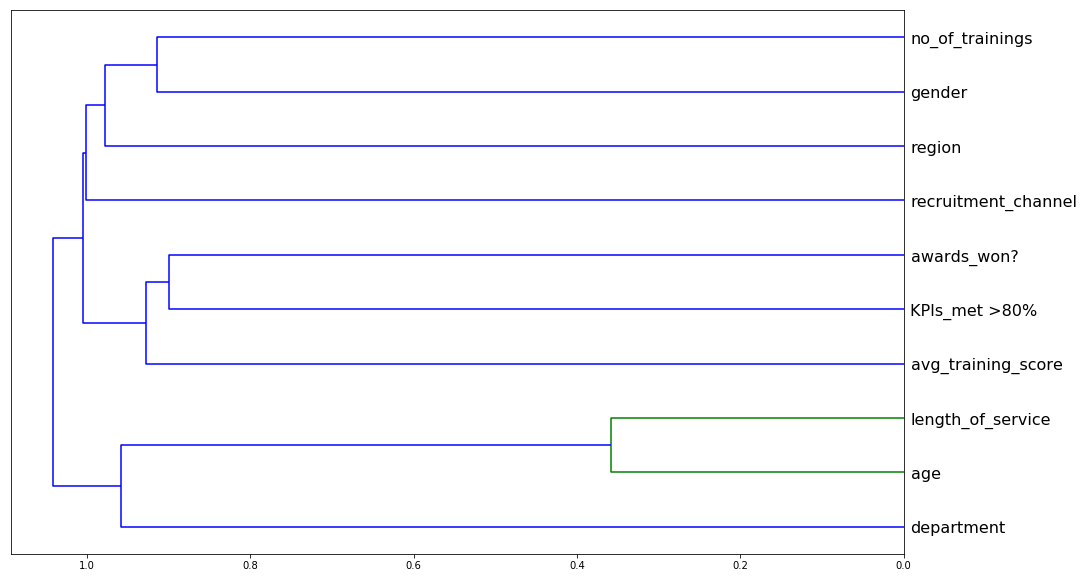

In [30]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(all_data).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=all_data.columns, orientation='left', leaf_font_size=16)
plt.show()

In [32]:
import matplotlib.pyplot as plt

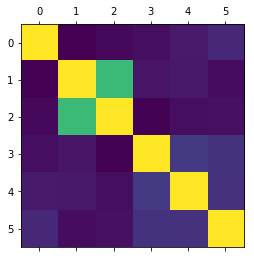

In [33]:
plt.matshow(all_data.corr())

In [37]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = all_data.corr()
corr.style.background_gradient().set_precision(2)

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
no_of_trainings,1,-0.083,-0.058,-0.044,-0.0048,0.044
age,-0.083,1,0.65,-0.026,-0.0074,-0.045
length_of_service,-0.058,0.65,1,-0.078,-0.041,-0.035
KPIs_met >80%,-0.044,-0.026,-0.078,1,0.1,0.077
awards_won?,-0.0048,-0.0074,-0.041,0.1,1,0.073
avg_training_score,0.044,-0.045,-0.035,0.077,0.073,1


In [38]:
#There is a very less corelation between variables . maximum relation is 65% in age  and length_of_service

In [39]:
#Doing some EDA


In [40]:
import matplotlib.pyplot as plt

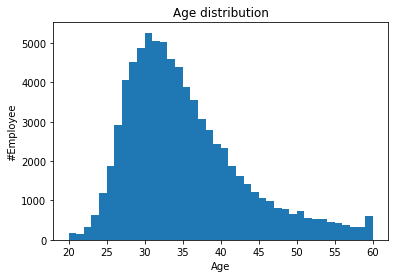

In [59]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(all_data['age'],bins = 40)
#Labels and Tit
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Employee')
plt.show()
#Maximum age group is 28-35

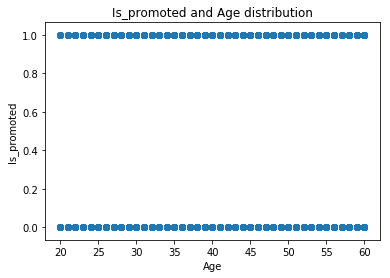

In [63]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df_train['age'],Target)
#Labels and Tit
plt.title('Is_promoted and Age distribution')
plt.xlabel('Age')
plt.ylabel('Is_promoted')
plt.show()